In [18]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from value import *
from get_prn_dir import *

In [24]:
# read prn file data
def prn_read(path_file):
    with open(path_file) as f:
        csv_prn = []
        prn_data = csv.reader(f)
        for b in prn_data:
            if b == []:
                continue
            else:
                csv_prn.append(b[0].split())
            arry = np.array(csv_prn[1:])
            # astype string ==>> float
            csv_matrix = arry.astype(float)
        f.close()
        return csv_matrix

# calculate Refection loss
def RL_equation(csv_matrix,d,pi):
    A = csv_matrix
    print(A)
    Z_1 = np.sqrt( 
        (A[:,3] + 1j * A[:,4])
        /
        (A[:,1] + 1j * A[:,2]) 
    )

    Z_2 =np.tanh(

        (-1j*(2*pi*A[:,0]*np.sqrt((A[:,1]+1j*A[:,2])*(A[:,3]+1j*A[:,4]))*d/2.99792458e11))

    )
      
    Z = Z_1 * Z_2
    RL = 20 * np.log10( np.abs((1-Z)/(1+Z)))
    return(RL)



def quick_plot(path_file,d,pi):
    #quick show plot
    csv_matrix =prn_read(path_file)
    RL = RL_equation(csv_matrix,d,pi)
    
    FIG = plt.subplot()
    FIG.plot(csv_matrix[:,0]/10e8,RL)
    FIG.set(xlabel='Fequency (1e10 GHz)', ylabel='Reflection loss (DB)',
       title='RL & Fequency\n' + path_file)
    plt.show()

[[1.0000000e+08 9.2518000e+00 1.5034000e+00 1.9403000e+00 8.7560000e-01]
 [1.2237500e+08 9.0121000e+00 1.5100000e+00 2.0143000e+00 7.6450000e-01]
 [1.4475000e+08 8.8723000e+00 1.5070000e+00 1.9673000e+00 6.8530000e-01]
 ...
 [1.7955250e+10 5.5182000e+00 2.9490000e-01 1.2858000e+00 6.1100000e-02]
 [1.7977625e+10 5.3904000e+00 2.5400000e-01 1.3135000e+00 7.1100000e-02]
 [1.8000000e+10 5.2766000e+00 1.6650000e-01 1.3380000e+00 9.3700000e-02]]


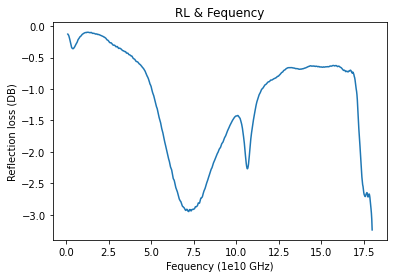

In [25]:

quick_plot(path_file= r'E:\Python\矢网测量数据_2022-01-13\SFZAO_#1_3.22mm.prn',d = 4,pi = pi)